In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
T=np.array([104.0255239
,110.0195639
,116.3882313
,123.1315263
,128.7509388
,134.7449787
,143.7360387
,150.1047061
,156.0987461
,160.9689036
,167.337571
,173.331611
,179.3256509
,184.5704359
,189.8152209
,195.4346333
,200.6794183
,207.4227133
,213.0421257
])
V_J=np.array([4.72222E-12
,4.96528E-12
,5.25694E-12
,5.54167E-12
,5.82639E-12
,6.11806E-12
,6.50694E-12
,6.75694E-12
,6.94444E-12
,7.20833E-12
,7.46528E-12
,7.73611E-12
,7.95833E-12
,8.21528E-12
,8.40972E-12
,8.69444E-12
,8.88194E-12
,9.22222E-12
,9.38889E-12
])

In [3]:
def delta(x):
    return len(x)*np.sum(x**2)-(np.sum(x))**2
def intercepto(x,y):
    c=(np.sum(x**2)*np.sum(y)-np.sum(x)*np.sum(x*y))
    return c/delta(x)
def pendiente(x,y):
    m= len(x)*np.sum(x*y)-np.sum(x)*np.sum(y)
    return m/delta(x)

In [4]:
m=pendiente(T,V_J)
c=intercepto(T,V_J)
m,c

(4.300762130551657e-14, 2.6959643558270595e-13)

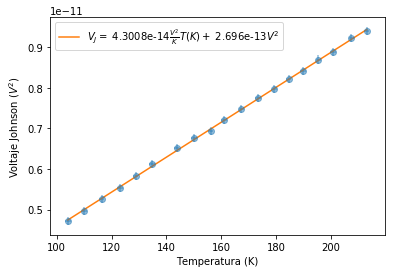

In [5]:
plt.figure()
plt.errorbar(T,V_J,xerr=np.ones(len(T)), yerr=1E-13*np.ones(len(T)), fmt="o", alpha=0.5)
plt.plot(T,m*T+c, label=r"$V_J=$" +" {}".format(4.3008E-14)+r"$\frac{V^2}{K}T(K)+$"+" {}".format(2.696E-13)+r"$V^2$")
plt.ylabel("Voltaje Johnson "+r"$(V^2)$")
plt.xlabel("Temperatura (K)")
plt.legend()
plt.savefig("temperatureJohnson.jpg")

In [6]:

def alpha_CU(x,y):
    a=np.sum((y-pendiente(x,y)*x-intercepto(x,y))**2)
    return np.sqrt(a/(len(x)-2))
def alpha_C(x,y):
    a=np.sum(x**2)
    a2=a/delta(x)
    return alpha_CU(x,y)*np.sqrt(a2)
def alpha_M(x,y):
    return alpha_CU(x,y)*np.sqrt(len(x)/delta(x))
a_M, a_C=alpha_M(T,V_J),alpha_C(T,V_J)
a_M,a_C

(2.1595232087126846e-16, 3.527691751936389e-14)

In [8]:
kB=m/(4*9997*98600)
kB

1.0907841649025278e-23

In [13]:
dr=1000
dkb=np.sqrt(((a_M*20/7)/(4*9997*98600))**2+(m*dr/(4*9997*(98600)**2))**2)

In [14]:
dkb

1.9164320555108586e-25